In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin, clone
from sklearn.pipeline import Pipeline

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
df = pd.read_csv("C:\\Users\\User\\Desktop\\Statistical leraning I\\Final project\\online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
print(df.duplicated().sum())
df=df.drop_duplicates()
df.shape

125


(12205, 18)

In [4]:
X = df.drop(['Revenue'], axis = 1)
y = df['Revenue']

In [5]:
class AddNewVariables(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X['Administrative_Duration_Page'] = X['Administrative_Duration']/df['Administrative']
        X['Informational_Duration_Page'] = X['Informational_Duration']/df['Informational']
        X['ProductRelated_Duration_Page'] = X['ProductRelated_Duration']/df['ProductRelated']
        
        # division by zero becomes zero
        X['Administrative_Duration_Page'] = X['Administrative_Duration_Page'].fillna(0)
        X['Informational_Duration_Page'] = X['Informational_Duration_Page'].fillna(0)
        X['ProductRelated_Duration_Page'] = X['ProductRelated_Duration_Page'].fillna(0)
     
        return X

In [6]:
class DropVariables(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop):
        self.columns_to_drop = columns_to_drop

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X.drop(columns=self.columns_to_drop)

In [7]:
pipe = Pipeline([
    ('add_new_vars', AddNewVariables()),
    ('drop_old_vars', DropVariables(columns_to_drop=['Administrative', 'Informational', 'ProductRelated', 'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']))  
])

In [8]:
pipe1 = clone(pipe)

In [9]:
X = pipe1.fit_transform(X.copy())
X

,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Administrative_Duration_Page,Informational_Duration_Page,ProductRelated_Duration_Page
0,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,0.000000,0.0,0.000000
1,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,0.000000,0.0,32.000000
2,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,0.000000,0.0,0.000000
3,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,0.000000,0.0,1.333333
4,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,0.000000,0.0,62.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,48.333333,0.0,33.656447
12326,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,0.000000,0.0,93.150000
12327,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,0.000000,0.0,30.708333
12328,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,18.750000,0.0,23.066667


In [133]:
y=LabelEncoder().fit_transform(y)
y.shape

(12205,)

In [11]:
X['Weekend'] = LabelEncoder().fit_transform(X['Weekend'])
     
mapping_month = {'Jan' : 1, 'Feb' : 2,
                 'Mar' : 3, 'Apr' : 4,
                 'May' : 5, 'June' : 6,
                 'Jul' : 7, 'Aug' : 8,
                 'Sep' : 9, 'Oct' : 10,
                 'Nov' : 11, 'Dec' : 12}

X['Month'] = X['Month'].map(mapping_month)
X

,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Administrative_Duration_Page,Informational_Duration_Page,ProductRelated_Duration_Page
0,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,Returning_Visitor,0,0.000000,0.0,0.000000
1,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,Returning_Visitor,0,0.000000,0.0,32.000000
2,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,Returning_Visitor,0,0.000000,0.0,0.000000
3,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,Returning_Visitor,0,0.000000,0.0,1.333333
4,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,Returning_Visitor,1,0.000000,0.0,62.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.007143,0.029031,12.241717,0.0,12,4,6,1,1,Returning_Visitor,1,48.333333,0.0,33.656447
12326,0.000000,0.021333,0.000000,0.0,11,3,2,1,8,Returning_Visitor,1,0.000000,0.0,93.150000
12327,0.083333,0.086667,0.000000,0.0,11,3,2,1,13,Returning_Visitor,1,0.000000,0.0,30.708333
12328,0.000000,0.021053,0.000000,0.0,11,2,2,3,11,Returning_Visitor,0,18.750000,0.0,23.066667


In [134]:
one_hot_encoded_data =pd.get_dummies(X['VisitorType'],prefix="VType")
X = X.join(one_hot_encoded_data)
X = X.drop(['VisitorType'], axis = 1)

X['VType_New_Visitor'] = LabelEncoder().fit_transform(X['VType_New_Visitor'])
X['VType_Other'] = LabelEncoder().fit_transform(X['VType_Other'])
X['VType_Returning_Visitor'] = LabelEncoder().fit_transform(X['VType_Returning_Visitor'])

X.shape

(12205, 19)

In [175]:
#pip install prince

In [14]:
import pandas as pd
from prince import FAMD

In [21]:
import pandas as pd

# Convert X and y into pandas DataFrame or Series objects
X = pd.DataFrame(X)
y = pd.Series(y)

# Concatenate X and y along columns axis
combined_df = pd.concat([X, y], axis=1)

# Print the combined dataframe
#print(combined_df)

       BounceRates  ExitRates  PageValues  SpecialDay  Month  \
0             0.20       0.20         0.0         0.0    2.0   
1             0.00       0.10         0.0         0.0    2.0   
2             0.20       0.20         0.0         0.0    2.0   
3             0.05       0.14         0.0         0.0    2.0   
4             0.02       0.05         0.0         0.0    2.0   
...            ...        ...         ...         ...    ...   
11934          NaN        NaN         NaN         NaN    NaN   
11938          NaN        NaN         NaN         NaN    NaN   
12159          NaN        NaN         NaN         NaN    NaN   
12180          NaN        NaN         NaN         NaN    NaN   
12185          NaN        NaN         NaN         NaN    NaN   

       OperatingSystems  Browser  Region  TrafficType  Weekend  \
0                   1.0      1.0     1.0          1.0      0.0   
1                   2.0      2.0     1.0          2.0      0.0   
2                   4.0      1.0 

In [28]:
combined_df = combined_df.rename(columns={0: 'Revenue'})
combined_df.head()

,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Administrative_Duration_Page,Informational_Duration_Page,ProductRelated_Duration_Page,VType_New_Visitor,VType_Other,VType_Returning_Visitor,Revenue
0,0.20,0.20,0.0,0.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0
1,0.00,0.10,0.0,0.0,2.0,2.0,2.0,1.0,2.0,0.0,0.0,0.0,32.000000,0.0,0.0,1.0,0.0
2,0.20,0.20,0.0,0.0,2.0,4.0,1.0,9.0,3.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0
3,0.05,0.14,0.0,0.0,2.0,3.0,2.0,2.0,4.0,0.0,0.0,0.0,1.333333,0.0,0.0,1.0,0.0
4,0.02,0.05,0.0,0.0,2.0,3.0,3.0,1.0,4.0,1.0,0.0,0.0,62.750000,0.0,0.0,1.0,0.0


In [176]:
#pip install prince

In [30]:
import pandas as pd
from prince import FAMD

In [51]:
import prince
famd = prince.FAMD(
    n_components=2,
    n_iter=3,
    copy=True,
    check_input=True,
    random_state=100,
    engine="sklearn",
    handle_unknown="error"  # same parameter as sklearn.preprocessing.OneHotEncoder
)
famd = famd.fit(X)

In [52]:
famd.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,13.436,4.93%,4.93%
1,10.163,3.73%,8.66%


In [93]:
factor_coordinates=famd.row_coordinates(X)
factor_coordinates

component,0,1
0,0.109348,-4.608146
1,-0.197577,-3.081651
2,3.093269,-4.564867
3,-0.421409,-4.057826
4,-0.827673,-4.142284
...,...,...
12325,-0.048768,1.022292
12326,-0.313843,-1.177473
12327,-0.400182,-1.584012
12328,-0.068225,0.181402


In [55]:
famd.column_coordinates_

component,0,1
variable,,
BounceRates,0.001919,0.046048
ExitRates,0.002897,0.069764
PageValues,0.013849,0.013299
SpecialDay,0.005715,0.025327
Administrative_Duration_Page,0.000318,0.009373
Informational_Duration_Page,0.000314,0.000019
ProductRelated_Duration_Page,0.000186,0.000057
Browser,0.778668,0.135329
Month,0.075328,0.062613


In [157]:
#famd.column_contributions_.style.format('{:.0%}')

In [95]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=100)
clusters = kmeans.fit_predict(factor_coordinates)

In [96]:
X_with_clusters = X.copy()  # Assuming X is your original DataFrame
X_with_clusters['Cluster'] = clusters

NameError: name 'cluters' is not defined

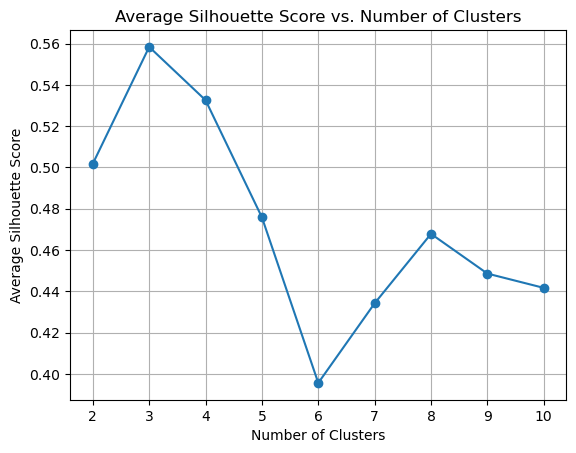

In [99]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

cluster_range = range(2, 11)  # You can adjust this range

# Initialize lists to store the number of clusters and corresponding silhouette scores
num_clusters = []
silhouette_scores = []

# Iterate over different numbers of clusters
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=100)
    clusters = kmeans.fit_predict(factor_coordinates)
    
    # Compute the silhouette score
    silhouette_avg = silhouette_score(factor_coordinates, clusters)
    
    # Append the number of clusters and silhouette score to lists
    num_clusters.append(n_clusters)
    silhouette_scores.append(silhouette_avg)

# Plot the number of clusters against the average silhouette score
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Average Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()

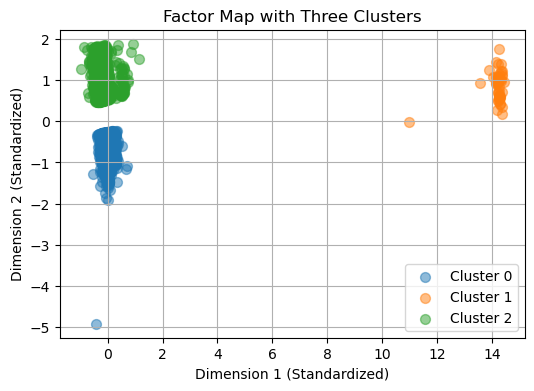

In [120]:
standardized_coordinates = (factor_coordinates - factor_coordinates.mean()) / factor_coordinates.std()

# Plot the factor map with three clusters
plt.figure(figsize=(6, 4))
for cluster_label in range(3):
    plt.scatter(standardized_coordinates.iloc[clusters == cluster_label, 0], 
                standardized_coordinates.iloc[clusters == cluster_label, 1], 
                label=f'Cluster {cluster_label}', alpha=0.5, marker='o', s=50)
plt.title('Factor Map with Three Clusters')
plt.xlabel('Dimension 1 (Standardized)')
plt.ylabel('Dimension 2 (Standardized)')
plt.legend()
plt.grid(True)
plt.show()

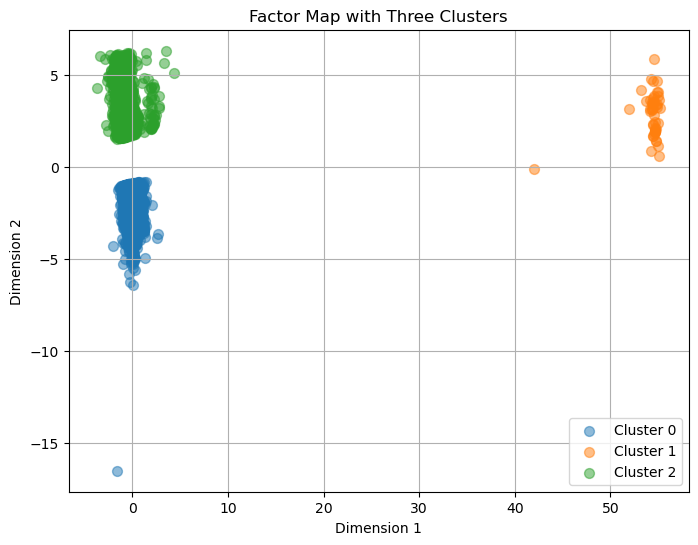

In [105]:
plt.figure(figsize=(8, 6))
for cluster_label in range(3):
    plt.scatter(factor_coordinates.iloc[clusters == cluster_label, 0], 
                factor_coordinates.iloc[clusters == cluster_label, 1], 
                label=f'Cluster {cluster_label}', alpha=0.5, marker='o', s=50)
plt.title('Factor Map with Three Clusters')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.grid(True)
plt.show()

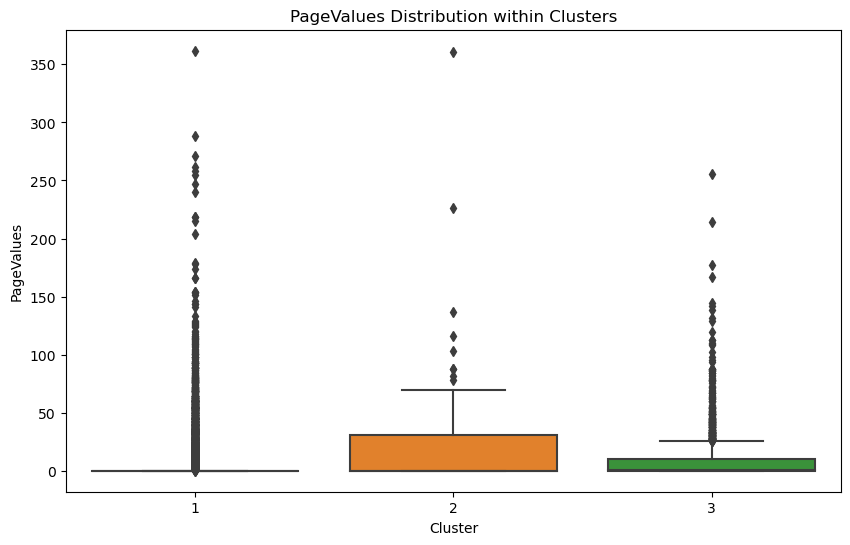

In [121]:
import seaborn as sns

# Assuming X_with_clusters contains the original DataFrame with cluster labels
# Assuming 'PageValues' is the column name for the continuous variable

# Add 1 to cluster labels to start from 1
X_with_clusters['Cluster'] += 1

# Plot the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_with_clusters, x='Cluster', y='PageValues')
plt.title('PageValues Distribution within Clusters')
plt.xlabel('Cluster')
plt.ylabel('PageValues')
plt.show()

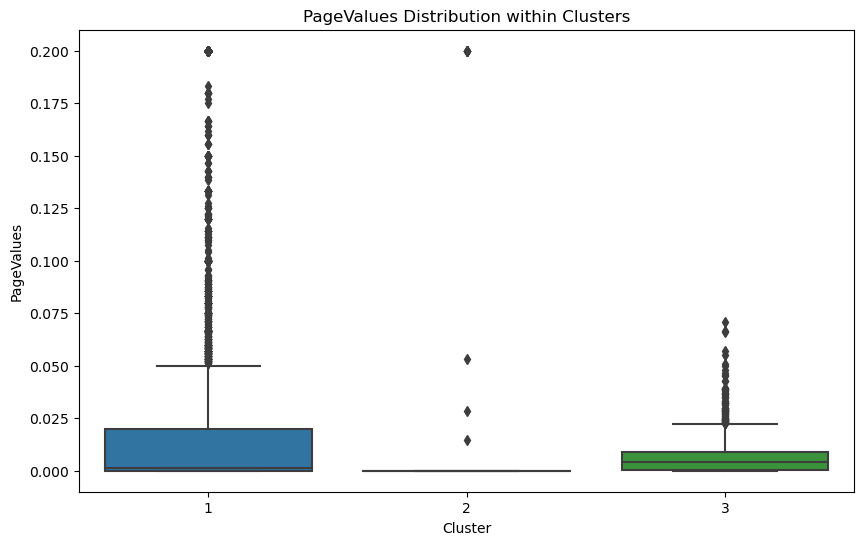

In [125]:
import seaborn as sns

X_with_clusters['Cluster'] += 1
X_with_clusters['Cluster'] = X_with_clusters['Cluster'].replace({4: 1, 5: 2, 6: 3})

# Plot the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_with_clusters, x='Cluster', y='BounceRates')
plt.title('PageValues Distribution within Clusters')
plt.xlabel('Cluster')
plt.ylabel('PageValues')
plt.show()

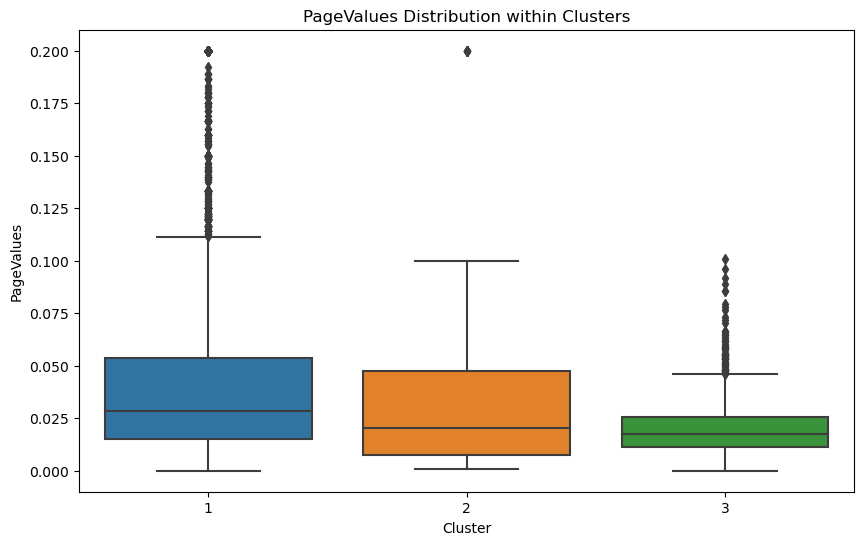

In [127]:
import seaborn as sns



# Plot the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_with_clusters, x='Cluster', y='ExitRates')
plt.title('PageValues Distribution within Clusters')
plt.xlabel('Cluster')
plt.ylabel('PageValues')
plt.show()

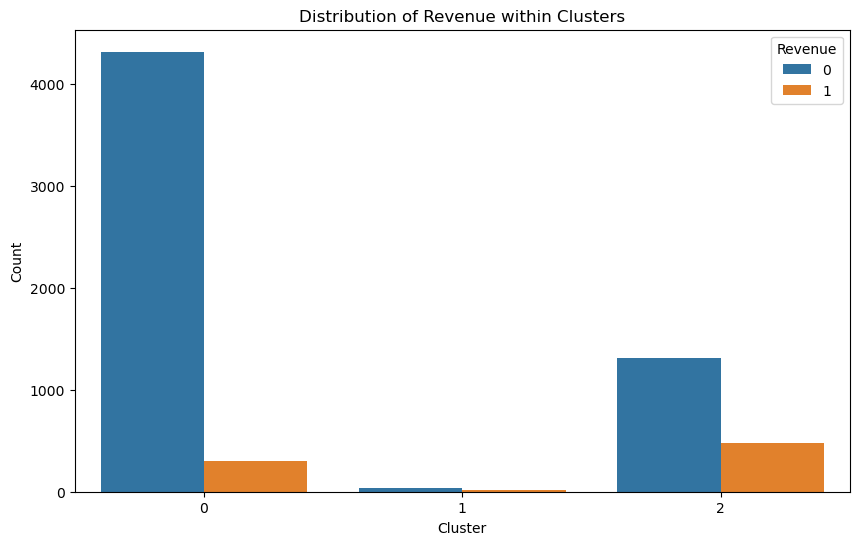

In [149]:
import pandas as pd
import seaborn as sns

# Convert X and y to DataFrames if they are not already
X_df = pd.DataFrame(X, columns=[ 'Administrative_Duration_Page', 'Informational_Duration_Page',  'ProductRelated_Duration_Page','BounceRates', 'ExitRates', 'PageValues', 'SpecialDay','Month','OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend'])  # Replace X_column_names with actual column names if available
y_series = pd.Series(y, name='Revenue')

X_df.reset_index(drop=True, inplace=True)
y_series.reset_index(drop=True, inplace=True)

# Combine X_df, y_series, and cluster labels
data = pd.concat([X_df, y_series], axis=1)
data['Cluster'] = clusters  # Assuming 'clusters' contains the cluster labels

cluster_indices = clusters < 3  # Assuming there are only three clusters labeled as 0, 1, and 2
filtered_data = data[cluster_indices]

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_data, x='Cluster', hue='Revenue')
plt.title('Distribution of Revenue within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Revenue')
plt.show()
#numerical_columns=[ 'Administrative_Duration_Page', 'Informational_Duration_Page',  'ProductRelated_Duration_Page','BounceRates', 'ExitRates', 'PageValues', 'SpecialDay','Month','OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend']


<Figure size 1000x600 with 0 Axes>

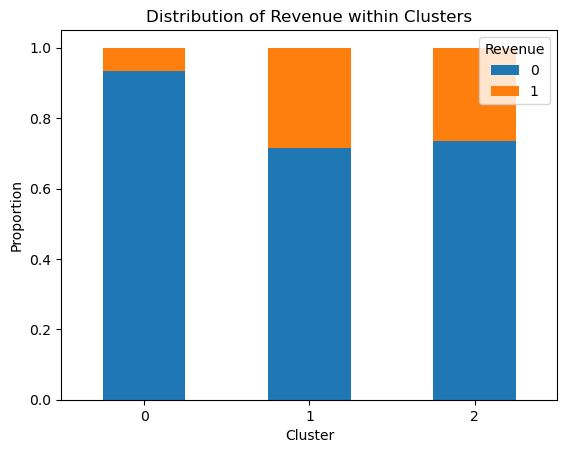

In [156]:
cluster_0_data = data[data['Cluster'] == 0]
cluster_1_data = data[data['Cluster'] == 1]
cluster_2_data = data[data['Cluster'] == 2]

# Concatenate the data for the three clusters
filtered_data = pd.concat([cluster_0_data, cluster_1_data, cluster_2_data])

cluster_revenue_counts = filtered_data.groupby(['Cluster', 'Revenue']).size().unstack(fill_value=0)

# Normalize the counts within each cluster
cluster_revenue_counts_normalized = cluster_revenue_counts.div(cluster_revenue_counts.sum(axis=1), axis=0)

# Plot the stacked bar plot
plt.figure(figsize=(10, 6))
cluster_revenue_counts_normalized.plot(kind='bar', stacked=True)
plt.title('Distribution of Revenue within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.legend(title='Revenue', loc='upper right')
plt.xticks(rotation=0)
plt.show()

In [161]:
#numerical_columns=[ 'Administrative_Duration_Page', 'Informational_Duration_Page',  'ProductRelated_Duration_Page']
#for i in numerical_columns:
 #   plt.figure(figsize=(10, 6))
  #  sns.boxplot(data=filtered_data, x='Cluster', y=i)
   # plt.title('ProductRelated_Duration_Page within Clusters')
    #plt.xlabel('Cluster')
     #plt.ylabel('ProductRelated_Duration_Page')
    #plt.show()


<Figure size 1000x600 with 0 Axes>

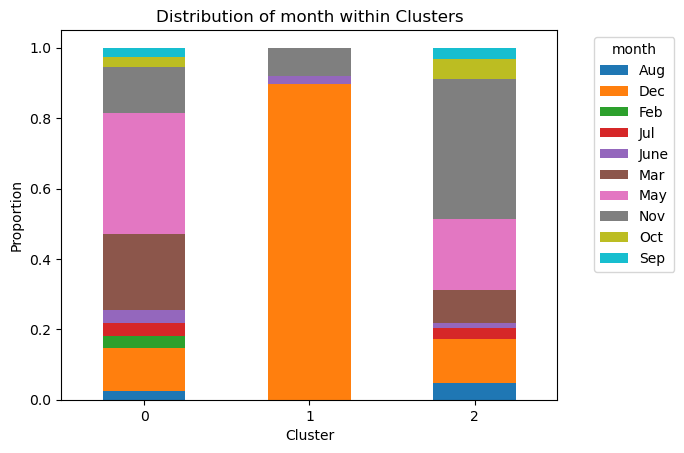

In [174]:
# Concatenate the data for the three clusters
filtered_data = pd.concat([cluster_0_data, cluster_1_data, cluster_2_data])

cluster_revenue_counts = filtered_data.groupby(['Cluster', 'Month']).size().unstack(fill_value=0)

# Normalize the counts within each cluster
cluster_revenue_counts_normalized = cluster_revenue_counts.div(cluster_revenue_counts.sum(axis=1), axis=0)

# Plot the stacked bar plot
plt.figure(figsize=(10, 6))
cluster_revenue_counts_normalized.plot(kind='bar', stacked=True)
plt.title('Distribution of month within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.legend(title='month', loc='upper right',bbox_to_anchor=(1.25, 1))
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

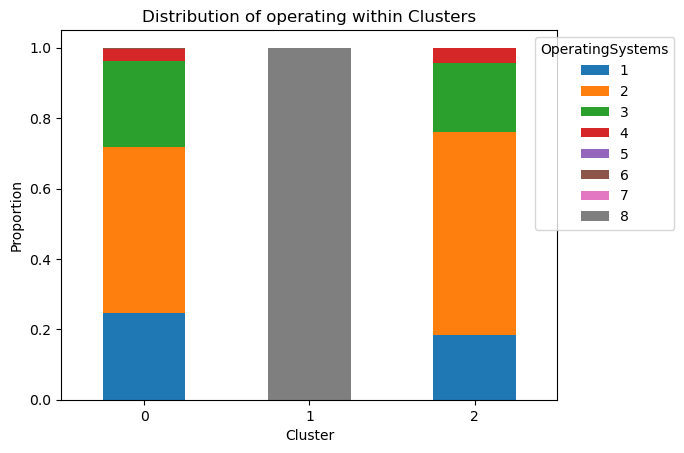

In [171]:
cluster_revenue_counts = filtered_data.groupby(['Cluster', 'OperatingSystems']).size().unstack(fill_value=0)

# Normalize the counts within each cluster
cluster_revenue_counts_normalized = cluster_revenue_counts.div(cluster_revenue_counts.sum(axis=1), axis=0)

# Plot the stacked bar plot
plt.figure(figsize=(10, 6))
cluster_revenue_counts_normalized.plot(kind='bar', stacked=True)
plt.title('Distribution of operating within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.legend(title='OperatingSystems', loc='upper right',bbox_to_anchor=(1.25, 1))
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x800 with 0 Axes>

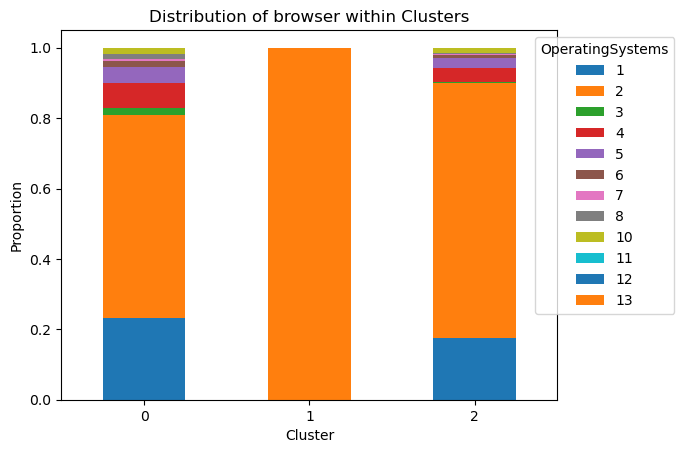

In [173]:
cluster_revenue_counts = filtered_data.groupby(['Cluster', 'Browser']).size().unstack(fill_value=0)

# Normalize the counts within each cluster
cluster_revenue_counts_normalized = cluster_revenue_counts.div(cluster_revenue_counts.sum(axis=1), axis=0)

# Plot the stacked bar plot
plt.figure(figsize=(10, 8))
cluster_revenue_counts_normalized.plot(kind='bar', stacked=True)
plt.title('Distribution of browser within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.legend(title='OperatingSystems', loc='upper right',bbox_to_anchor=(1.25, 1))
plt.xticks(rotation=0)
plt.show()